# Classification Assignment


## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

# ______________________________
# ______________________________
df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________

# ____________________________
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

# ____________________________
for column in df:
    if column=="Holding_Policy_Type":
        pass
    else:
        if df[column].isnull().any():
            if(column in cateogry_columns):
                df[column]=df[column].fillna(df[column].mode()[0])
            else:
                df[column]=df[column].fillna(df[column].mean())

In [6]:
df['Holding_Policy_Type'].value_counts()
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(3.0)

In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________
df=df.replace({'Holding_Policy_Duration':{'NaN':"14+"}},regex=True)
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")
df['Holding_Policy_Duration'].astype(str).astype(int)

<ipython-input-7-41df0525c10d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")


0       14
1       10
2        3
3        1
4       14
        ..
9995    14
9996     6
9997     8
9998    14
9999    14
Name: Holding_Policy_Duration, Length: 10000, dtype: int32

In [8]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________
print('Accomodation_Type : ',df['Accomodation_Type'].unique())
print('Reco_Insurance_Type : ',df['Reco_Insurance_Type'].unique())
print('Is_Spouse : ',df['Is_Spouse'].unique())

Accomodation_Type :  ['Owned' 'Rented']
Reco_Insurance_Type :  ['Individual' 'Joint']
Is_Spouse :  ['No' 'Yes']


In [9]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
df['Accomodation_Type'].replace(('Owned','Rented'), (1, 0), inplace=True)
df['Reco_Insurance_Type'].replace(('Individual','Joint'), (1, 0), inplace=True)
df['Is_Spouse'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [10]:
# Now again having a look at all those columns to see if everything went well

# _________________________________
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,14,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,3,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,14,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,1,0,47,40,1,X5,14,3.0,19,27840.0,1
9996,35448,35449,C5,1477,0,1,34,34,0,X1,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,1,1,64,64,0,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,0,1,53,53,0,X5,14,3.0,13,11664.0,0


In [11]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  object 
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [12]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________
df.select_dtypes(include=['object']).columns.tolist()

['City_Code', 'Health Indicator', 'Holding_Policy_Duration']

In [13]:
num_col = df.select_dtypes(exclude=['object'])
num_col

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,64,1,1,36,36,0,2.0,16,13320.0,0
1,33499,33500,2955,1,1,66,66,0,1.0,19,16152.0,0
2,7997,7998,1542,0,1,24,24,0,1.0,16,7310.0,0
3,33032,33033,772,0,1,75,75,0,3.0,16,15792.0,0
4,30516,30517,1510,1,0,59,58,1,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,1,0,47,40,1,3.0,19,27840.0,1
9996,35448,35449,1477,0,1,34,34,0,1.0,4,10560.0,0
9997,47253,47254,2357,1,1,64,64,0,2.0,19,14716.0,0
9998,42544,42545,1443,0,1,53,53,0,3.0,13,11664.0,0


In [14]:
# You can also do this to separate Object columns

# ____________________________
cat_col = df.select_dtypes(include=['object'])
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [15]:
# Lets just try to see what is happening Response. Check the output.

cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [16]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.shape



(10000, 14)

In [17]:
# Getting all the Object Dtypes

cat_col.head()

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14


In [18]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________

cat_col['City_Code'].replace(('C3','C1','C26','C2','C17','C4' ,'C16', 'C9','C23','C21','C6','C7','C11','C22','C15','C13', 'C8','C35','C29','C33','C10','C12', 'C19', 'C5' ,'C18','C14','C24','C27','C20','C34','C36','C25','C28','C32','C30','C31'), (3,1,26,2,17,4,16,9,23,21,6,7,11,22,15,13,8,35,29,33,10,12,19,5,18,14,24,27,20,34,36,25,28,32,30,31), inplace=True)
cat_col['Health Indicator'].replace(('X1','X6','X4','X2','X3','X5','X8','X7','X9'), (1,6,4,2,3,5,8,7,9), inplace=True)
cat_col['Holding_Policy_Duration'].replace(('14','10','3','1','7','13','9','8','2','4','5','11','6','12'), (14,10,3,1,7,13,9,8,2,4,5,11,6,12), inplace=True)


C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
# Concatinating the original data frame and onehot encoded dataframe

df_encoded = pd.concat([num_col, cat_col], axis=1)
df_encoded

,Unnamed: 0,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
0,27385,27386,64,1,1,36,36,0,2.0,16,13320.0,0,3,1,14
1,33499,33500,2955,1,1,66,66,0,1.0,19,16152.0,0,3,6,10
2,7997,7998,1542,0,1,24,24,0,1.0,16,7310.0,0,1,1,3
3,33032,33033,772,0,1,75,75,0,3.0,16,15792.0,0,26,1,1
4,30516,30517,1510,1,0,59,58,1,4.0,17,23673.0,0,2,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,13,1,0,47,40,1,3.0,19,27840.0,1,3,5,14
9996,35448,35449,1477,0,1,34,34,0,1.0,4,10560.0,0,5,1,6
9997,47253,47254,2357,1,1,64,64,0,2.0,19,14716.0,0,1,1,8
9998,42544,42545,1443,0,1,53,53,0,3.0,13,11664.0,0,1,5,14


In [20]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe



## Observe that 24.59% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [21]:
X = df_encoded.drop('Response',axis=1)
y = df_encoded['Response']

In [22]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
X_sampled, y_sampled = nm_sampler.fit_resample(X,y)

In [23]:
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (10000, 14)
Shape of y :  (10000,)


In [24]:
print(X_sampled.shape)
print(y_sampled.shape)

(4918, 14)
(4918,)


# ---------------------------------------------------------------------------------------------------------- 

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sampled = scaler.fit_transform(X_sampled)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=2)

# -------------------------------------------------------------------------------------------------------

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [28]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6273512963904423
Testing Accuracy Score : 0.6138211382113821


In [30]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

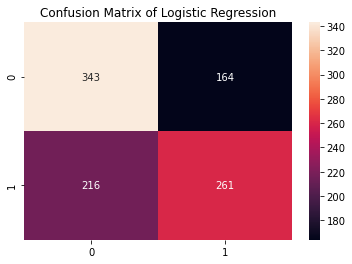

In [31]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Logistic Regression")

In [32]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64       507
           1       0.61      0.55      0.58       477

    accuracy                           0.61       984
   macro avg       0.61      0.61      0.61       984
weighted avg       0.61      0.61      0.61       984



AUC: 0.666


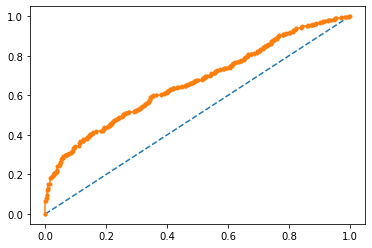

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = log_reg.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

In [35]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C':[0.001,0.01,0.1,1,10,100,1000]}]

grid = GridSearchCV(
    estimator= LogisticRegression(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [36]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 0.01}
LogisticRegression(C=0.01)

Score on Test Data:  0.6117886178861789


In [37]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009599,0.003200,0.000000,0.000000,0.001,{'C': 0.001},0.602287,0.607370,0.616264,0.641677,...,0.622527,0.017619,7,0.626311,0.628535,0.630442,0.623769,0.621982,0.626208,0.003071
1,0.016225,0.000196,0.000000,0.000000,0.01,{'C': 0.01},0.611182,0.637865,0.618806,0.630241,...,0.627609,0.011061,1,0.634573,0.633302,0.633619,0.628217,0.628018,0.631546,0.002831
2,0.020897,0.004002,0.000000,0.000000,0.1,{'C': 0.1},0.616264,0.634053,0.616264,0.626429,...,0.627101,0.010204,2,0.632031,0.631077,0.633619,0.627264,0.626429,0.630084,0.002778
3,0.019427,0.003966,0.001600,0.003201,1,{'C': 1},0.613723,0.634053,0.614994,0.628971,...,0.626084,0.010062,6,0.631395,0.629806,0.633937,0.626629,0.625476,0.629449,0.003092
4,0.020919,0.006312,0.003199,0.003919,10,{'C': 10},0.614994,0.634053,0.614994,0.628971,...,0.626338,0.009758,3,0.631713,0.629806,0.633619,0.625675,0.625794,0.629322,0.003167


In [38]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(C=0.001)

logistic.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [39]:
pred_train = logistic.predict(X_train)
pred_test = logistic.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6263345195729537
Testing Accuracy Score : 0.6077235772357723


In [41]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression(Hyper Parameter Tuning)')

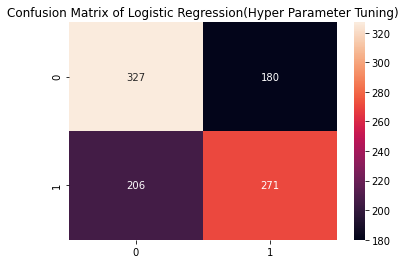

In [42]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Logistic Regression(Hyper Parameter Tuning)")

In [43]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63       507
           1       0.60      0.57      0.58       477

    accuracy                           0.61       984
   macro avg       0.61      0.61      0.61       984
weighted avg       0.61      0.61      0.61       984



AUC: 0.667


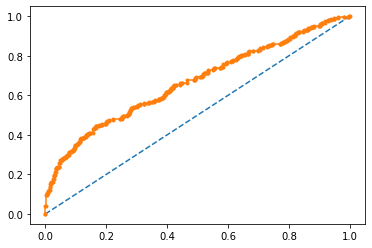

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = logistic.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

# ---------------------------------------------------------------------------------------------------------

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

## SVM

In [45]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

In [46]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6893746822572445
Testing Accuracy Score : 0.6473577235772358


In [48]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of SVC Classifier')

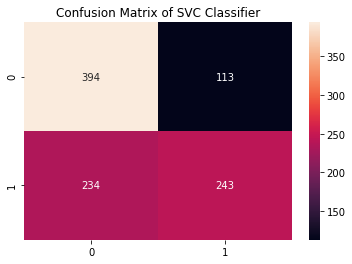

In [49]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of SVC Classifier")

In [50]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.78      0.69       507
           1       0.68      0.51      0.58       477

    accuracy                           0.65       984
   macro avg       0.65      0.64      0.64       984
weighted avg       0.65      0.65      0.64       984



AUC: 0.697


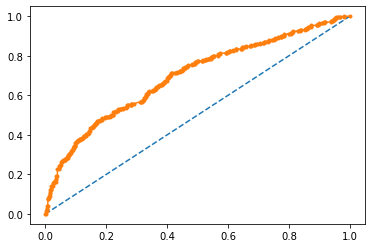

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = svc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   5.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   5.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   5.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   5.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   5.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.628 total time=   5.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.630 total time=   5.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   5.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.657 total time=   5.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   5.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.615 total time=   5.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.558 total time=   6.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.558 total time=   6.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.565 total time=   7.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.581 total time=   7.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.524 total time=  38.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.565 total time=  42.1s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.572 total time=  45.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.543 total time=  40.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.588 total time=  42.7s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.604 total time=  22.3s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.635 total time=  24.3s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.625 total time=  24.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01, probability=True)

Score on Test Data:  0.6473577235772358


In [54]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.249331,0.053610,0.504549,0.008617,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.504447,0.504447,0.503177,0.503177,0.503817,0.503813,0.000568,24
1,4.950164,0.161806,0.446502,0.012547,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.627700,0.630241,0.612452,0.656925,0.656489,0.636761,0.017386,7
2,4.995103,0.111295,0.457958,0.013976,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.614994,0.631512,0.622618,0.651842,0.652672,0.634727,0.015240,8
3,5.626428,0.196836,0.556979,0.048150,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.581957,0.604828,0.595934,0.621347,0.611959,0.603205,0.013511,17
4,5.681516,0.368071,0.508147,0.012705,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.504447,0.504447,0.503177,0.503177,0.503817,0.503813,0.000568,24


In [55]:
from sklearn.svm import SVC

svc = SVC(C=1000, gamma=0.01, probability=True, kernel='rbf')
svc.fit(X_train,y_train)

SVC(C=1000, gamma=0.01, probability=True)

In [56]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7142857142857143
Testing Accuracy Score : 0.6351626016260162


In [58]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of SVC (Hyper Parameter Tuning)')

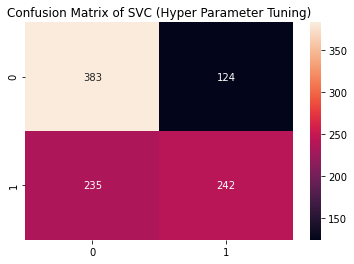

In [59]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of SVC (Hyper Parameter Tuning)")

In [60]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       507
           1       0.66      0.51      0.57       477

    accuracy                           0.64       984
   macro avg       0.64      0.63      0.63       984
weighted avg       0.64      0.64      0.63       984



AUC: 0.688


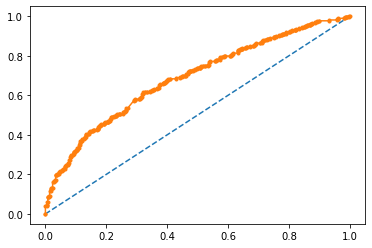

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = svc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7516522623284189
Testing Accuracy Score : 0.5965447154471545


In [65]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of KNN Classifier')

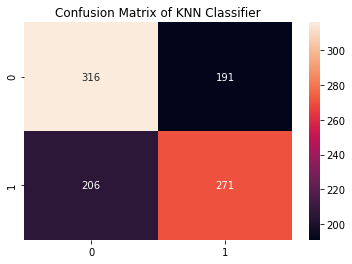

In [66]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of KNN Classifier")

In [67]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       507
           1       0.59      0.57      0.58       477

    accuracy                           0.60       984
   macro avg       0.60      0.60      0.60       984
weighted avg       0.60      0.60      0.60       984



AUC: 0.634


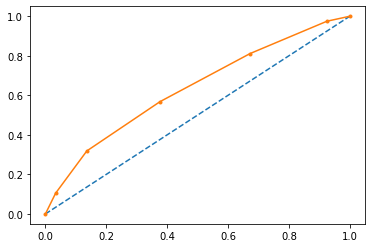

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = knn.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 1, cv=5, n_jobs = -1)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [70]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=15)

Score on Test Data:  0.6219512195121951


In [71]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019854,0.000775,0.129465,0.010074,minkowski,5,uniform,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.576874,0.606099,0.585769,0.578145,0.606870,0.590751,0.013204,25
1,0.017863,0.003041,0.084069,0.003677,minkowski,5,distance,"{'metric': 'minkowski', 'n_neighbors': 5, 'wei...",0.575604,0.604828,0.585769,0.587039,0.603053,0.591259,0.011102,23
2,0.019454,0.001000,0.124832,0.003797,minkowski,7,uniform,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.561626,0.592122,0.583227,0.589581,0.605598,0.586431,0.014389,31
3,0.020774,0.001938,0.088938,0.003216,minkowski,7,distance,"{'metric': 'minkowski', 'n_neighbors': 7, 'wei...",0.561626,0.590851,0.588310,0.593393,0.603053,0.587447,0.013842,29
4,0.019596,0.000876,0.138674,0.006768,minkowski,9,uniform,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei...",0.569250,0.588310,0.584498,0.576874,0.625954,0.588977,0.019613,27


In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', metric = 'manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [73]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6748856126080326
Testing Accuracy Score : 0.6229674796747967


In [75]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of KNN Clasifier (Hyper Parameter Tuning)')

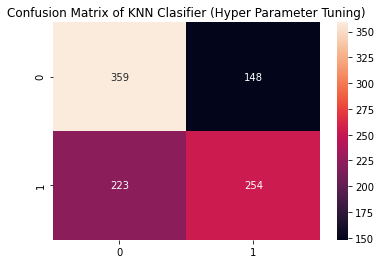

In [76]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of KNN Clasifier (Hyper Parameter Tuning)")

In [77]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.71      0.66       507
           1       0.63      0.53      0.58       477

    accuracy                           0.62       984
   macro avg       0.62      0.62      0.62       984
weighted avg       0.62      0.62      0.62       984



AUC: 0.652


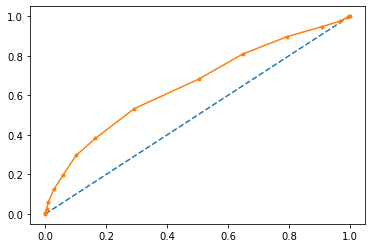

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = knn.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.5873983739837398


In [82]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier')

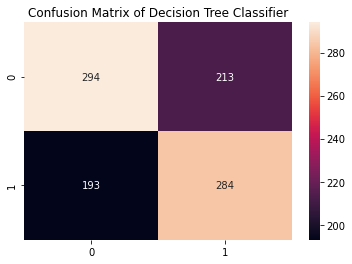

In [83]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree Classifier")

In [84]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.60      0.58      0.59       507
           1       0.57      0.60      0.58       477

    accuracy                           0.59       984
   macro avg       0.59      0.59      0.59       984
weighted avg       0.59      0.59      0.59       984



AUC: 0.588


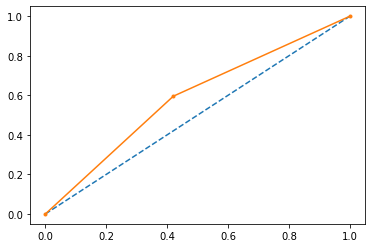

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = tree.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

grid= GridSearchCV(
    estimator= DecisionTreeClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [87]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

Score on Test Data:  0.6371951219512195


In [88]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001649,0.003298,0.000000,0.000000,1,{'max_depth': 1},0.581957,0.594663,0.597205,0.603558,...,0.596851,0.008627,9,0.604703,0.601525,0.600254,0.600890,0.603875,0.602250,0.001733
1,0.008182,0.000106,0.000000,0.000000,2,{'max_depth': 2},0.618806,0.630241,0.634053,0.648030,...,0.634216,0.009767,7,0.643470,0.647601,0.639339,0.639657,0.649936,0.644001,0.004221
2,0.011763,0.003707,0.000000,0.000000,3,{'max_depth': 3},0.623888,0.630241,0.634053,0.648030,...,0.635233,0.008259,5,0.647919,0.648554,0.640292,0.640610,0.650254,0.645526,0.004214
3,0.015137,0.002593,0.001621,0.003242,4,{'max_depth': 4},0.635324,0.649301,0.645489,0.651842,...,0.647689,0.007142,1,0.663171,0.666984,0.661900,0.655545,0.660419,0.661604,0.003731
4,0.020121,0.003768,0.003230,0.003956,5,{'max_depth': 5},0.637865,0.651842,0.641677,0.654384,...,0.646161,0.006166,2,0.669527,0.680013,0.671115,0.665396,0.669314,0.671073,0.004851


In [89]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [90]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6781901372648703
Testing Accuracy Score : 0.6382113821138211


In [92]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree (Hyper Parameter Tuning)')

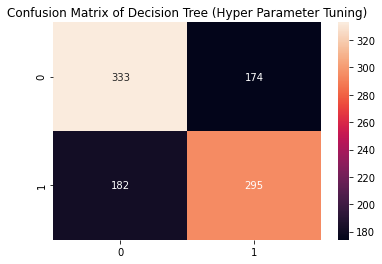

In [93]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree (Hyper Parameter Tuning)")

In [94]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       507
           1       0.63      0.62      0.62       477

    accuracy                           0.64       984
   macro avg       0.64      0.64      0.64       984
weighted avg       0.64      0.64      0.64       984



AUC: 0.692


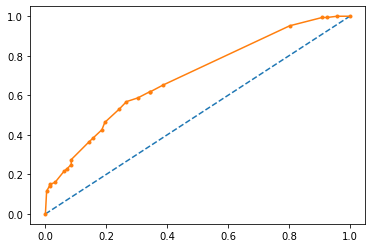

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = tree.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

> Ensemble Technique

## Bagging - RandomForestClassifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.6310975609756098


In [99]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier')

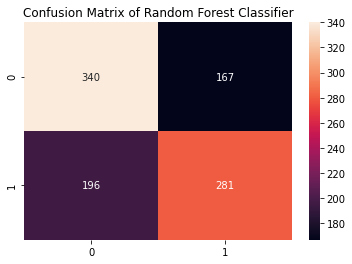

In [100]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest Classifier")

In [101]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       507
           1       0.63      0.59      0.61       477

    accuracy                           0.63       984
   macro avg       0.63      0.63      0.63       984
weighted avg       0.63      0.63      0.63       984



AUC: 0.691


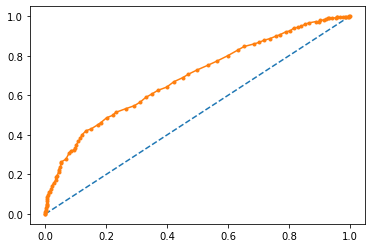

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = rfc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [103]:
tuned_parameters = [{'max_depth':[i for i in range(1,20)]}]

rfcc = GridSearchCV(
    estimator= RandomForestClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

rfcc.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [104]:
print("Best parameters set found on train set:")
print(rfcc.best_params_)
print(rfcc.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 4}
RandomForestClassifier(max_depth=4)

Score on Test Data:  0.6371951219512195


In [105]:
cv_results = pd.DataFrame(rfcc.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.367492,0.018389,0.032304,0.002929,1,{'max_depth': 1},0.612452,0.635324,0.637865,0.641677,...,0.636761,0.014195,17,0.642199,0.646648,0.649507,0.644741,0.642630,0.645145,0.002700
1,0.522414,0.111022,0.040404,0.009489,2,{'max_depth': 2},0.607370,0.639136,0.637865,0.646760,...,0.637524,0.016474,16,0.653956,0.653321,0.653638,0.649190,0.650889,0.652199,0.001854
2,0.602162,0.167303,0.044485,0.018911,3,{'max_depth': 3},0.621347,0.641677,0.639136,0.654384,...,0.642098,0.012090,10,0.662854,0.664442,0.656180,0.654274,0.656925,0.658935,0.003976
3,0.690316,0.142006,0.050581,0.016757,4,{'max_depth': 4},0.642948,0.645489,0.641677,0.659466,...,0.651504,0.010387,1,0.673657,0.672704,0.673022,0.668891,0.669949,0.671645,0.001872
4,0.829521,0.215286,0.057968,0.035187,5,{'max_depth': 5},0.632783,0.640407,0.646760,0.662008,...,0.650488,0.013867,2,0.687639,0.685097,0.680013,0.676200,0.677891,0.681368,0.004333


In [106]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=9)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [107]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7666497203863752
Testing Accuracy Score : 0.6544715447154471


In [109]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost (Hyper Parameter Tuning)')

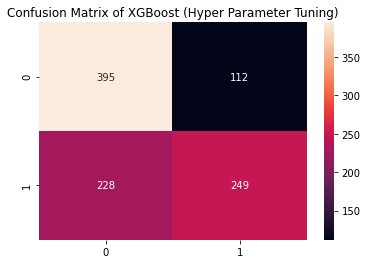

In [110]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost (Hyper Parameter Tuning)")

In [111]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       507
           1       0.69      0.52      0.59       477

    accuracy                           0.65       984
   macro avg       0.66      0.65      0.65       984
weighted avg       0.66      0.65      0.65       984



AUC: 0.713


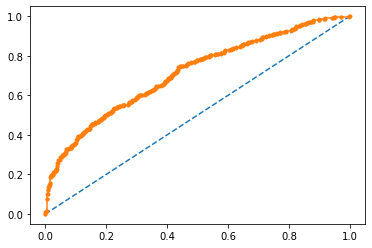

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = rfc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Boosting - XGBoost with hyperparameter tunning

In [113]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [114]:
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.9694966954753431
Testing Accuracy Score : 0.6310975609756098


In [116]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Classifier')

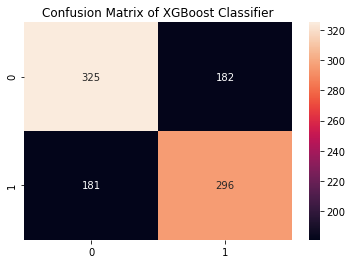

In [117]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost Classifier")

In [118]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64       507
           1       0.62      0.62      0.62       477

    accuracy                           0.63       984
   macro avg       0.63      0.63      0.63       984
weighted avg       0.63      0.63      0.63       984



AUC: 0.690


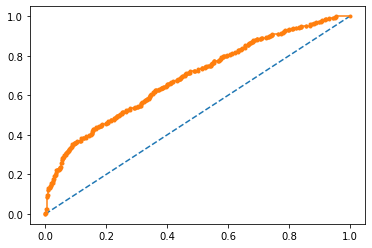

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = model_xgb.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [120]:
tuned_parameters = [{'max_depth':[i for i in range(1,10)]}]

grid = GridSearchCV(
    estimator= XGBClassifier(), 
    param_grid=tuned_parameters, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [121]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'max_depth': 1}
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

Score on Test Data:  0.6615853658536586


In [122]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.251146,0.084922,0.005641,0.004670,1,{'max_depth': 1},0.642948,0.645489,0.656925,0.673443,...,0.655568,0.010902,1,0.674293,0.676200,0.682237,0.670162,0.672173,0.675013,0.004140
1,0.294186,0.020483,0.006416,0.004642,2,{'max_depth': 2},0.635324,0.644219,0.640407,0.669632,...,0.647942,0.011875,3,0.728313,0.718144,0.719098,0.719733,0.727764,0.722610,0.004464
2,0.397011,0.019445,0.006096,0.003408,3,{'max_depth': 3},0.637865,0.641677,0.645489,0.656925,...,0.647944,0.008049,2,0.793136,0.790594,0.794407,0.796949,0.797332,0.794484,0.002496
3,0.451174,0.037402,0.005725,0.004732,4,{'max_depth': 4},0.642948,0.635324,0.636595,0.656925,...,0.643112,0.007673,4,0.863680,0.862409,0.874166,0.881474,0.878018,0.871949,0.007640
4,0.515448,0.017833,0.005758,0.003924,5,{'max_depth': 5},0.621347,0.621347,0.637865,0.648030,...,0.632435,0.010197,5,0.932952,0.932634,0.948840,0.947251,0.942503,0.940836,0.006891


In [123]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier(max_depth = 1)

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [124]:
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)

In [125]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6695475343162176
Testing Accuracy Score : 0.6615853658536586


In [126]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost (Hyper Parameter Tuning)')

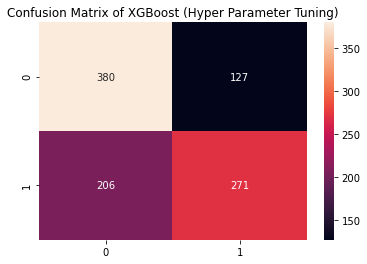

In [127]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost (Hyper Parameter Tuning)")

In [128]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70       507
           1       0.68      0.57      0.62       477

    accuracy                           0.66       984
   macro avg       0.66      0.66      0.66       984
weighted avg       0.66      0.66      0.66       984



AUC: 0.717


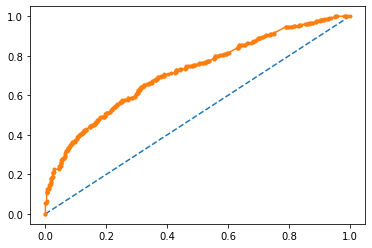

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = model_xgb.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Boosting - AdaBoost with hyperparameter tunning

In [130]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls = AdaBoostClassifier()
ada_cls.fit(X_train,y_train)

AdaBoostClassifier()

In [131]:
pred_train = ada_cls.predict(X_train)
pred_test = ada_cls.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.675902389425521
Testing Accuracy Score : 0.6544715447154471


In [133]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost Classifier')

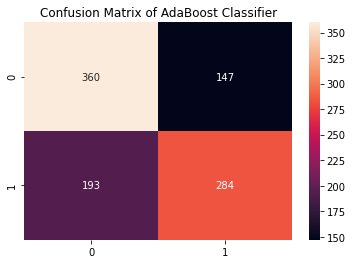

In [134]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost Classifier")

In [135]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       507
           1       0.66      0.60      0.63       477

    accuracy                           0.65       984
   macro avg       0.65      0.65      0.65       984
weighted avg       0.65      0.65      0.65       984



AUC: 0.709


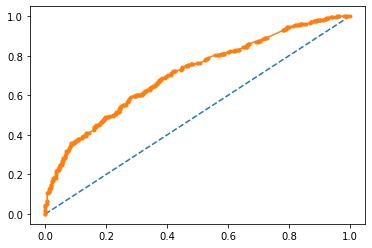

In [136]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = ada_cls.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Hyperparameter Tuning

In [137]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]
}
grid = GridSearchCV(AdaBoostClassifier(random_state = 5), parameters, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=5), n_jobs=-1,
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20, 30]},
             verbose=1)

In [138]:
print("Best parameters set found on train set:")
print(grid.best_params_)
print(grid.best_estimator_)
print()

print('Score on Test Data: ', grid.score(X_test, y_test))

Best parameters set found on train set:
{'n_estimators': 20}
AdaBoostClassifier(n_estimators=20, random_state=5)

Score on Test Data:  0.6636178861788617


In [139]:
cv_results = pd.DataFrame(grid.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009803,0.003123,0.000326,0.000651,1,{'n_estimators': 1},0.581957,0.594663,0.597205,0.603558,0.606870,0.596851,0.008627,14
1,0.029117,0.015327,0.000000,0.000000,2,{'n_estimators': 2},0.618806,0.628971,0.634053,0.651842,0.636132,0.633961,0.010762,13
2,0.023793,0.002760,0.003987,0.004165,3,{'n_estimators': 3},0.625159,0.628971,0.637865,0.648030,0.639949,0.635995,0.008133,12
3,0.032091,0.003237,0.000406,0.000812,4,{'n_estimators': 4},0.622618,0.634053,0.639136,0.651842,0.639949,0.637520,0.009463,11
4,0.035453,0.004355,0.004879,0.003984,5,{'n_estimators': 5},0.625159,0.634053,0.639136,0.651842,0.639949,0.638028,0.008685,10


In [140]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls = AdaBoostClassifier(n_estimators = 12)
ada_cls.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=12)

In [141]:
pred_train = ada_cls.predict(X_train)
pred_test = ada_cls.predict(X_test)

In [142]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6588713777325877
Testing Accuracy Score : 0.6504065040650406


In [143]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost (Hyper Parameter Tuning)')

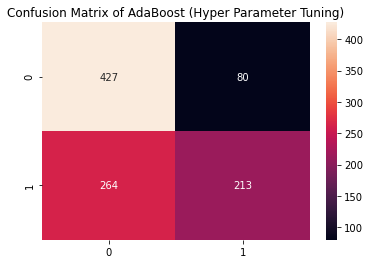

In [144]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost (Hyper Parameter Tuning)")

In [145]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       507
           1       0.73      0.45      0.55       477

    accuracy                           0.65       984
   macro avg       0.67      0.64      0.63       984
weighted avg       0.67      0.65      0.64       984



AUC: 0.706


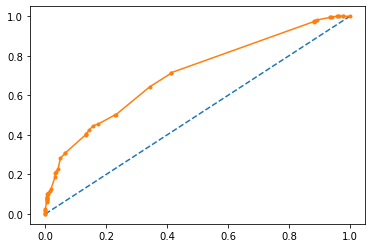

In [146]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = ada_cls.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

# All model score without Feature Engineering

In [147]:
algo=[log_reg,svc,knn,tree,rfc,model_xgb,ada_cls]

In [148]:
model=[]
accuracy_test=[]
accuracy_train=[]
for i in range(len(algo)):
    algo[i].fit(X_train,y_train)
    accuracy_train.append(algo[i].score(X_train,y_train))
    accuracy_test.append(algo[i].score(X_test,y_test))
    model.append(algo[i])

In [149]:
mod=pd.DataFrame([model,accuracy_train,accuracy_test]).T
mod.columns=['model','score_train','score_test']
mod

,model,score_train,score_test
0,LogisticRegression(),0.627351,0.613821
1,"SVC(C=1000, gamma=0.01, probability=True)",0.714286,0.635163
2,"KNeighborsClassifier(metric='manhattan', n_nei...",0.674886,0.622967
3,DecisionTreeClassifier(max_depth=6),0.67819,0.637195
4,"(DecisionTreeClassifier(max_depth=9, max_featu...",0.76182,0.653455
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.669548,0.661585
6,"(DecisionTreeClassifier(max_depth=1, random_st...",0.658871,0.650407
